<a href="https://colab.research.google.com/github/flydevilz/RecomSys/blob/main/Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare

This cell imports a variety of essential libraries and modules that will be used throughout the code for data manipulation, visualization, text processing, and machine learning.

1. `gdown`: Used to download files from Google Drive using a direct link.
2. `numpy`: A fundamental package for numerical computing in Python, providing support for large multi-dimensional arrays and matrices.
3. `pandas`: A powerful data manipulation and analysis library that provides data structures like DataFrames.
4. `matplotlib.pyplot`: A plotting library used for creating static, animated, and interactive visualizations in Python.
5. `seaborn`: A statistical data visualization library built on top of Matplotlib that provides a high-level interface for drawing attractive graphs.
6. `string`: A module providing various string operations.
7. `random`: A module that implements pseudo-random number generators for various distributions.
8. `re`: A module providing support for regular expressions in Python, used for string matching and manipulation.
9. `sklearn.feature_extraction.text.TfidfVectorizer`: A class that converts a collection of raw documents into a matrix of TF-IDF features.
10. `sklearn.metrics.pairwise.cosine_similarity, linear_kernel`: Functions for computing similarity between vectors, particularly useful in text processing and recommendation systems.
11. `zipfile.ZipFile`: A module that allows working with ZIP archives.
12. `tensorflow as tf`: TensorFlow is a deep learning framework for building and deploying machine learning models.
13. `tensorflow.keras`: A high-level neural networks API, part of TensorFlow, used for building and training models.
14. `tensorflow.keras.layers`: A module in Keras that contains various layers to build neural networks.
15. `pathlib.Path`: A module that offers classes representing filesystem paths with semantics appropriate for different operating systems.


In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import random
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In this section, the dataset are downloaded from Google Drive and Kaggle. The steps are below:
1. Use `gdown` to download the Kaggle API key from Google Drive.
2. Install the Kaggle API.
3. Set up Kaggle configuration.
4. Download the dataset from Kaggle. (dataset link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
5. Unzip the downloaded dataset.

In [ ]:
api = 'https://drive.google.com/uc?id=1HwbZemgag2jcb9QcEaJ1KcOajF8_xW36'

gdown.download(api, 'kaggle.json', quiet=False)

!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip /content/brazilian-ecommerce.zip

Downloading...
From: https://drive.google.com/uc?id=1HwbZemgag2jcb9QcEaJ1KcOajF8_xW36
To: /content/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 178kB/s]


Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
100% 42.6M/42.6M [00:03<00:00, 22.4MB/s]
100% 42.6M/42.6M [00:03<00:00, 14.2MB/s]
Archive:  /content/brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


# Data Understanding

In this section, each dataset is loaded and unnecessary columns that are not needed for further analysis are removed. After that, each dataframe structures is displayed, including the number of entries, column names, data types, and the number of non-null values in each column.

## Product Table

In [ ]:
product_item = pd.read_csv('/content/olist_products_dataset.csv')
product_item = product_item.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
product_item.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
product_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


## Bridging ID Table

In [ ]:
bridging_product_and_orderid = pd.read_csv('/content/olist_order_items_dataset.csv')
bridging_product_and_orderid = bridging_product_and_orderid.drop(columns=['shipping_limit_date', 'price', 'freight_value','order_item_id'])
bridging_product_and_orderid.head()

,order_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [ ]:
bridging_product_and_orderid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   order_id    112650 non-null  object
 1   product_id  112650 non-null  object
 2   seller_id   112650 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


## Seller Data

In [ ]:
bridging_orderid_and_sellerid = pd.read_csv('/content/olist_sellers_dataset.csv')

In [ ]:
bridging_orderid_and_sellerid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In this section, random store names are generated and mapped to each unique seller in the dataset. The process includes:
1. **Generate Unique Store Names**: A function is defined to create random store names for each unique `seller_id`.
2. **Map Store Names**: Store names are assigned to each seller in the DataFrame using a dictionary.
3. **Clean the DataFrame**: Drops the `seller_zip_code_prefix` column, as it is not needed for further analysis.


In [ ]:
unique_seller_ids = bridging_orderid_and_sellerid['seller_id'].unique()

def generate_random_store_name(length=8, random_state=42):
    random_string = ''.join(random.choices(string.ascii_lowercase, k=length))
    return f'{random_string} store'

# Create a dictionary mapping seller_id to a random store name
store_names = {seller_id: generate_random_store_name() for seller_id in unique_seller_ids}

# Map the store names to the original dataframe
bridging_orderid_and_sellerid['store_name'] = bridging_orderid_and_sellerid['seller_id'].map(store_names)

# Drop irrelevant columns
bridging_orderid_and_sellerid = bridging_orderid_and_sellerid.drop(columns=['seller_zip_code_prefix'])

In [ ]:
bridging_orderid_and_sellerid.head()

,seller_id,seller_city,seller_state,store_name
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,jpkgttkz store
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,cdeatuft store
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,tbplijxk store
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,pieapibv store
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,otxihnsx store


## Product purchase table

In [ ]:
bridging_product_and_custid = pd.read_csv('/content/olist_orders_dataset.csv')
bridging_product_and_custid = bridging_product_and_custid.drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date','order_purchase_timestamp'])
bridging_product_and_custid.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


In [ ]:
bridging_product_and_custid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     99441 non-null  object
 1   customer_id  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


## Review Table

In [ ]:
reviewid_orderid = pd.read_csv('/content/olist_order_reviews_dataset.csv')
reviewid_orderid = reviewid_orderid.drop(columns=['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'])
reviewid_orderid.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
reviewid_orderid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


## All Table Summarise

In this section, the code calculates and displays the unique counts of various entities in the dataset

In [ ]:
print('Jumlah produk : ', len(product_item.product_category_name.unique()))
print('Jumlah customer : ', len(bridging_product_and_custid.customer_id.unique()))
print('Jumlah order : ', len(bridging_product_and_orderid.order_id.unique()))
print('Jumlah review : ', len(reviewid_orderid.review_id.unique()))
print('Jumlah seller : ', len(bridging_orderid_and_sellerid.seller_id.unique()))

Jumlah produk :  74
Jumlah customer :  99441
Jumlah order :  98666
Jumlah review :  98410
Jumlah seller :  3095


# Data Preprocessing

## Table Merge

In this section, multiple DataFrames are merged to create a comprehensive dataset:
1. **Merge Product and Order Data**: Merges the `product_item` DataFrame with `bridging_product_and_orderid` on `product_id`.
2. **Merge with Seller Data**: Merges the resulting DataFrame with `bridging_orderid_and_sellerid` on `seller_id`.
3. **Merge with Customer Data**: Merges the resulting DataFrame with `bridging_product_and_custid` on `order_id`.
4. **Merge with Review Data**: Merges the final DataFrame with `reviewid_orderid` on `order_id`.
5. **Display the Data**: Shows the first few rows of the merged DataFrame.


In [ ]:
a = pd.merge(product_item, bridging_product_and_orderid, on='product_id', how='outer')
b = pd.merge(a, bridging_orderid_and_sellerid, on='seller_id', how='outer')
c= pd.merge(b, bridging_product_and_custid, on='order_id', how='outer')
d = pd.merge(c, reviewid_orderid, on='order_id', how='outer')
d.head()

,product_id,product_category_name,order_id,seller_id,seller_city,seller_state,store_name,customer_id,review_id,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,sao paulo,SP,rdinyxjz store,f8a3e963a310aa58b60a5b1fed5bceb5,d71da8fd8c6e3adef26be965f065b8a1,5.0
1,a035b83b3628decee6e3823924e0c10f,perfumaria,b18cb761efbe70da4838435a349abd07,5670f4db5b62c43d542e1b2d56b0cf7c,sao paulo,SP,rdinyxjz store,9ff6d1a05ecfe2d907adac11a2e2bfe9,0f0f85749cb82321d902e390a9c33694,4.0
2,091107484dd7172f5dcfed173e4a960e,perfumaria,a7708ffa8966514c098d15e1abfa6417,5670f4db5b62c43d542e1b2d56b0cf7c,sao paulo,SP,rdinyxjz store,360782688ff472f1adbd47a85861751e,39489f8518181b82cb86ce264e1ccc55,5.0
3,e8b61f78db501ea0ca45677d1ca27de2,brinquedos,a7708ffa8966514c098d15e1abfa6417,3d871de0142ce09b7081e2b9d1733cb1,campo limpo paulista,SP,eiraiewn store,360782688ff472f1adbd47a85861751e,39489f8518181b82cb86ce264e1ccc55,5.0
4,ccac9976bafbf7e587bd2c29302e2314,perfumaria,206d1a13596872a713dba14504fdf699,5670f4db5b62c43d542e1b2d56b0cf7c,sao paulo,SP,rdinyxjz store,58c5eb8e7844d1ecd85128e663f49e04,36b616f738d1f617cc12aeb2c01705f3,3.0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_id             113314 non-null  object 
 1   product_category_name  111702 non-null  object 
 2   order_id               114092 non-null  object 
 3   seller_id              113314 non-null  object 
 4   seller_city            113314 non-null  object 
 5   seller_state           113314 non-null  object 
 6   store_name             113314 non-null  object 
 7   customer_id            114092 non-null  object 
 8   review_id              113131 non-null  object 
 9   review_score           113131 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.7+ MB


In [ ]:
d.isnull().sum()

,0
product_id,778
product_category_name,2390
order_id,0
seller_id,778
seller_city,778
seller_state,778
store_name,778
customer_id,0
review_id,961
review_score,961


## Table Cleaning

In this section, the dataset is cleaned and filtered to focus on specific data:
1. **Remove Rows with Missing `review_score`**: Drops rows where the `review_score` is missing.
2. **Remove Rows with Missing `seller_id`**: Drops rows where the `seller_id` is missing.
3. **Remove Rows with Missing `product_category_name`**: Drops rows where the `product_category_name` is missing.
4. **Display DataFrame Structure**: Shows the structure of the cleaned DataFrame, including the number of entries and data types.


In [ ]:
f = d.dropna(subset=['review_score'])
g = f.dropna(subset=['seller_id'])
h = g.dropna(subset=['product_category_name'])

In [ ]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110774 entries, 0 to 113313
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_id             110774 non-null  object 
 1   product_category_name  110774 non-null  object 
 2   order_id               110774 non-null  object 
 3   seller_id              110774 non-null  object 
 4   seller_city            110774 non-null  object 
 5   seller_state           110774 non-null  object 
 6   store_name             110774 non-null  object 
 7   customer_id            110774 non-null  object 
 8   review_id              110774 non-null  object 
 9   review_score           110774 non-null  float64
dtypes: float64(1), object(9)
memory usage: 9.3+ MB


Filters the dataset to include only rows where the `seller_state` is 'MG', creating a smaller, focused dataset.

In [ ]:
k = h[(h['seller_state'] == 'MG')]

## Data Integrity Check

In this section, the dataset is further cleaned to ensure consistency in city names:
1. **Identify Unique City Names**: Lists all unique city names to check for errors or typos.
2. **Correct City Name Typos**: Applies corrections to known misspelled city names using a predefined dictionary.
3. **Remove Incorrect Entries**: Filters out rows where `seller_city` contains incorrect entries such as 'minas gerais' and 'castro pires'.
4. **Drop Duplicate Rows**: Removes any duplicate rows to ensure data integrity.


In [ ]:
# Check if there is error in spelling the name of the city
k['seller_city'].unique()

array(['borda da mata', 'betim', 'araguari', 'santa rita do sapucai',
       'belo horizonte', 'ibia', 'tres coracoes', 'uba',
       'conselheiro lafaiete', 'patos de minas', 'contagem', 'congonhal',
       'ribeirao das neves', 'sete lagoas', 'belo horizont', 'formiga',
       'monte siao', 'vespasiano', 'ilicinea', 'baependi', 'jacutinga',
       'nova lima', 'itauna', 'juiz de fora', 'pocos de caldas',
       'ponte nova', 'uberlandia', 'mateus leme', 'carmo do cajuru',
       'divinopolis', 'guiricema', 'guanhaes', 'claudio',
       'coronel fabriciano', 'ipatinga', 'arinos', 'muriae', 'varginha',
       'governador valadares', 'vicosa', 'barbacena/ minas gerais',
       'ouro fino', 'tiradentes', 'lagoa da prata', 'fronteira',
       'oliveira', 'sao joao del rei', 'timoteo', 'andradas', 'uberaba',
       'cataguases', 'lambari', 'alfenas', 'minas gerais',
       'itau de minas', 'araxa', 'bonfinopolis de minas', 'congonhas',
       'centro', 'pedro leopoldo', 'sabara', 'campo do

In [ ]:
# Fix typo city name
corrections = {
    'barbacena/ minas gerais' : 'barbacena',
    'belo horizont' : 'belo horizonte'
}
k['seller_city'] = k['seller_city'].replace(corrections)

<ipython-input-23-6f13d8ad8197>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['seller_city'] = k['seller_city'].replace(corrections)


In [ ]:
#  Remove incorrect entries
k = k[(k['seller_city'] != 'minas gerais') & (k['seller_city'] != 'castro pires')]
#  Drop duplicate entries
k = k.drop_duplicates()

## Summarise on State MG

This code calculates and displays the unique counts of various entities in the cleaned and filtered dataset of MG State.

In [ ]:
print('Number of products : ', len(k.product_category_name.unique()))
print('Number of customers : ', len(k.customer_id.unique()))
print('Number of cities : ', len(k.seller_city.unique()))
print('Number of orders : ', len(k.order_id.unique()))
print('Number of reviews : ', len(k.review_id.unique()))
print('Number of sellers : ', len(k.seller_id.unique()))

Number of products :  56
Number of customers :  7700
Number of cities :  75
Number of orders :  7700
Number of reviews :  7716
Number of sellers :  234


# Exploratory Data Analysis (EDA)

## Top product categories

This section visualizes the top 10 product categories based on their frequency in the dataset. The `value_counts()` function is used to count the occurrences of each product category, and the top 10 categories are selected for the plot. The bar chart below displays these categories along with their respective counts.


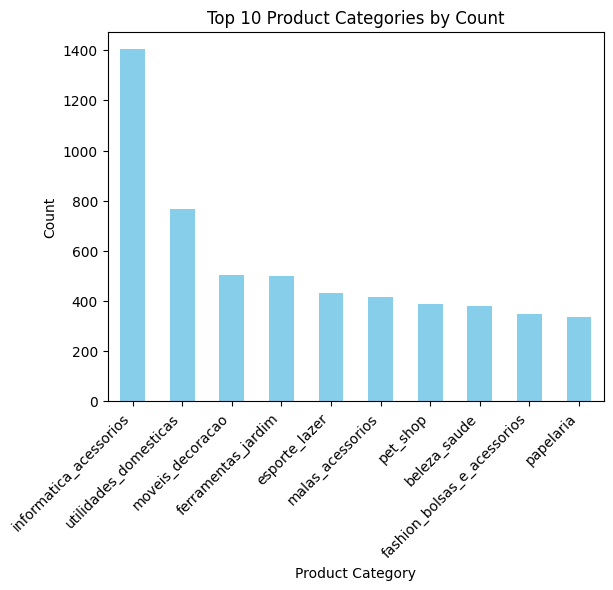

In [ ]:
top_categories = k['product_category_name'].value_counts().head(10)

# Plot the top product categories
plt.figure()
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Rating Statistical Summary

In [ ]:
k['review_score'].describe()

,review_score
count,7927.000000
mean,4.152138
std,1.293461
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Count Of Each Review Score

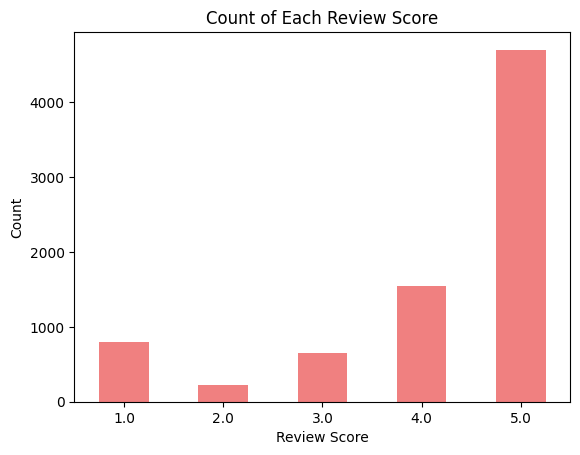

In [ ]:
# Count the number of occurrences for each review score
rating_counts = k['review_score'].value_counts().sort_index()

# Plot the count of each review score
plt.figure()
rating_counts.plot(kind='bar', color='lightcoral')
plt.title('Count of Each Review Score')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Highest Rated Product

This section analyzes and visualizes the top 10 highest-rated products based on their review scores. The `groupby` function is utilized to aggregate the review scores by product category, and the top 10 products are selected based on their total review scores.


<Figure size 640x480 with 0 Axes>

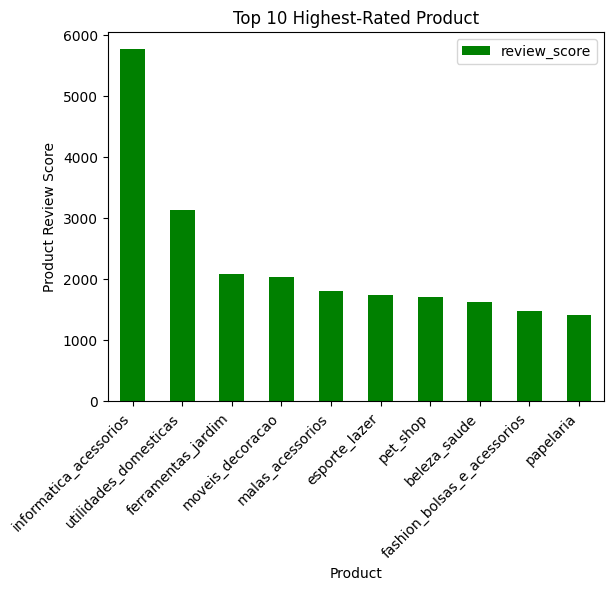

In [ ]:
review_score_by_product = k.groupby('product_category_name').sum()

top_10_product = review_score_by_product.sort_values(by='review_score', ascending=False).head(10)

plt.figure()
top_10_product.plot(kind='bar', color='green')
plt.title('Top 10 Highest-Rated Product')
plt.xlabel('Product')
plt.ylabel('Product Review Score')
plt.xticks(rotation=45, ha='right')
plt.show()

## Average review score by city

This section examines the distribution of review scores in the dataset. The `value_counts()` function is used to count the occurrences of each review score, which is then sorted by the score value to facilitate a clear understanding of the distribution.


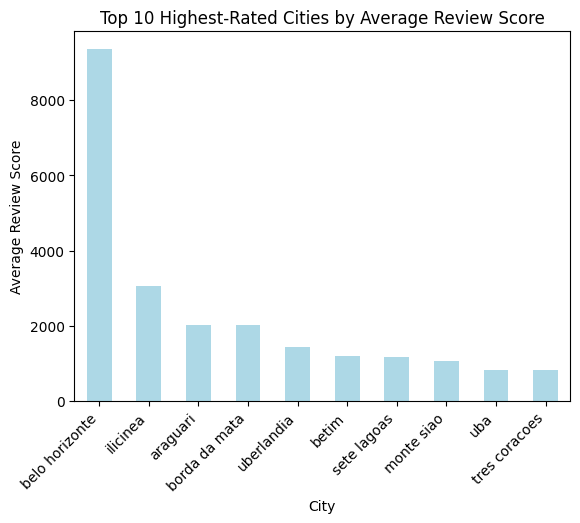

In [ ]:
# Calculate the average review score by city
review_score_by_city = k.groupby('seller_city')['review_score'].sum().sort_values(ascending=False)

# Plot the top 10 highest-rated cities for better visualization
top_10_cities = review_score_by_city.head(10)

plt.figure()
top_10_cities.plot(kind='bar', color='lightblue')
plt.title('Top 10 Highest-Rated Cities by Average Review Score')
plt.xlabel('City')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top Store

This section focuses on identifying and visualizing the top 10 highest-rated stores based on their cumulative review scores. The `groupby` function is used to aggregate review scores by store name, and the stores with the highest total scores are selected.


<Figure size 640x480 with 0 Axes>

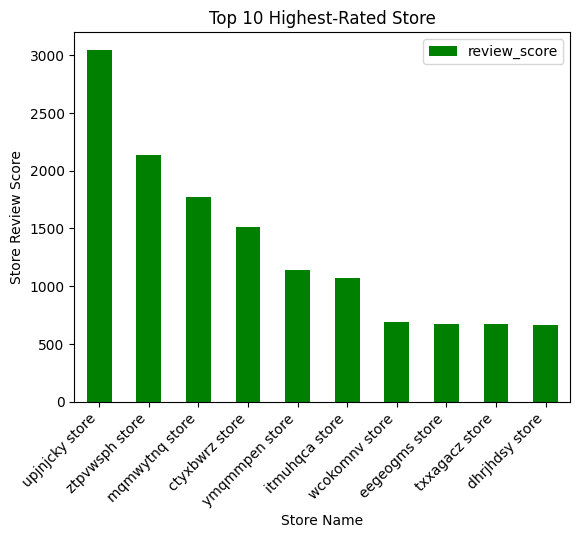

In [ ]:
review_score_by_store = k.groupby('store_name').sum()

top_10_stores = review_score_by_store.sort_values(by='review_score', ascending=False).head(10)

plt.figure()
top_10_stores.plot(kind='bar', color='green')
plt.title('Top 10 Highest-Rated Store')
plt.xlabel('Store Name')
plt.ylabel('Store Review Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Content Based Filtering

## Data Preparation

In this section, the dataset is prepared for content-based filtering:
1. **Drop Unnecessary Columns**: Removes columns that are not needed for the content-based filtering process, such as `product_id`, `product_category_name`, and others.
2. **Remove Duplicates**: Drops any duplicate rows to ensure that each entry is unique.
3. **Reset Index**: Resets the index of the DataFrame after dropping duplicates to ensure sequential indexing.

In [ ]:
l = k.drop(columns=['product_id', 'product_category_name', 'order_id', 'seller_id', 'seller_state', 'customer_id', 'review_id', 'review_score'])
l= l.drop_duplicates().reset_index(drop=True)

In [ ]:
l.head()

,seller_city,store_name
0,borda da mata,rukucore store
1,betim,crpgtovq store
2,araguari,ctyxbwrz store
3,santa rita do sapucai,lpqyzeci store
4,belo horizonte,vecfqfdb store


## Feature Extraction

In this section, a TF-IDF Vectorizer is applied to the `seller_city` column to transform the city names into a numerical matrix:
1. **Initialize TF-IDF Vectorizer**: Creates an instance of the `TfidfVectorizer`, which converts text data into a matrix of TF-IDF features.
2. **Transform City Names**: The `fit_transform` method is used to learn the vocabulary and create a TF-IDF matrix based on the `seller_city` values.
3. **Check Matrix Shape**: Prints the shape of the resulting matrix, showing the number of rows (cities) and columns (features).


In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(l['seller_city'])

# Check the shape of the resulting matrix
print(tfidf_matrix.shape)

(234, 104)


In this section, the code computes and visualizes the cosine similarity between different seller cities:
1. **Compute Cosine Similarity**: Uses the `linear_kernel` function to calculate the cosine similarity between the TF-IDF vectors of `seller_city`, resulting in a similarity matrix.
2. **Create DataFrame**: Converts the similarity matrix into a DataFrame, with city names as both the row and column labels for easy interpretation.
3. **Output the Shape**: Prints the shape of the DataFrame to show the number of cities and the dimensions of the similarity matrix.
4. **View Sample of Similarity Matrix**: Displays a random sample of the similarity matrix to get a glimpse of the calculated similarities between different cities.

In [ ]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a DataFrame from the cosine similarity matrix with city names as both rows and columns
cosine_sim_df = pd.DataFrame(cosine_sim, index=l['seller_city'], columns=l['seller_city'])

# Output the shape of the DataFrame
print('Shape:', cosine_sim_df.shape)

# View a sample of the similarity matrix
print(cosine_sim_df.sample(5, axis=1).sample(10, axis=0))

Shape: (234, 234)
seller_city      juiz de fora  belo horizonte  santa rita do sapucai  \
seller_city                                                            
formiga              0.000000             0.0                    0.0   
ipatinga             0.000000             0.0                    0.0   
itauna               0.000000             0.0                    0.0   
congonhas            0.000000             0.0                    0.0   
pocos de caldas      0.236768             0.0                    0.0   
formiga              0.000000             0.0                    0.0   
belo horizonte       0.000000             1.0                    0.0   
belo horizonte       0.000000             1.0                    0.0   
juiz de fora         1.000000             0.0                    0.0   
sete lagoas          0.000000             0.0                    0.0   

seller_city      montes claros  lagoa santa  
seller_city                                  
formiga                  

## Getting Recommendation

In this section, the code sets up a mechanism to recommend stores based on the similarity of their cities:

1. **Create Mapping of Store Names to Indices**:
   - A `Series` is created to map each `store_name` to its corresponding index in the DataFrame. This helps quickly locate a store's index using its name.

2. **Define Recommendation Function**:
   - A function `get_recommendations` is defined to retrieve store recommendations based on city similarity.
   - **Find Store Index**: The function begins by finding the index of the given `store_name` using the `indices` mapping.
   - **Compute Similarity Scores**: It then retrieves the pairwise similarity scores between the selected store and all other stores.
   - **Sort and Rank Stores**: The stores are sorted by their similarity scores in descending order.
   - **Select Top Recommendations**: The function returns the top 10 stores that are most similar to the selected store based on city similarity, excluding the store itself.

This setup allows users to get recommendations of stores that are located in cities similar to the one where the selected store is located.

In [ ]:
# Create a series to map store_name to the index
indices = pd.Series(l.index, index= l['store_name']).drop_duplicates()

# Function to get recommendations based on city similarity
def get_recommendations(store_name, cosine_sim=cosine_sim):
    idx = indices[store_name]

    # Get the pairwise similarity scores of all stores with that store
    sim_scores = cosine_sim[idx]

    # Ensure sim_scores is a 1D array (flatten if necessary)
    if len(sim_scores.shape) > 1:
        sim_scores = sim_scores.flatten()

    # Pair store indices with similarity scores
    sim_scores = list(enumerate(sim_scores))

    # Sort the stores based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar stores
    sim_scores = sim_scores[1:11]

    # Get the store indices
    store_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar stores based on city similarity
    return l['store_name'].iloc[store_indices]

The `get_recommendations` function is called with the store name to generate recommendations.

In [ ]:
# Get the store name from the user
user_input = input("Enter the store name: ")

# Get the city name for the input store
input_city = l.loc[l['store_name'] == user_input, 'seller_city'].values[0]

# Call the get_recommendations function with the user input
recommended_stores = get_recommendations(user_input)

# Display the recommendations with the city name
print(f"Top 10 recommended stores similar to '{user_input}' in {input_city}:")
for i, store in enumerate(recommended_stores, 1):
    # Get the city name for each recommended store
    store_city = l.loc[l['store_name'] == store, 'seller_city'].values[0]
    print(f"{i}. {store}")

Enter the store name: vecfqfdb store
Top 10 recommended stores similar to 'vecfqfdb store' in belo horizonte:
1. ztpvwsph store
2. neulmmzj store
3. jjbnkvii store
4. tcuqfrpv store
5. mowyecpy store
6. evykewsb store
7. eegeogms store
8. gvdmnzjd store
9. delffjql store
10. hspaytmd store


## Evaluation

In this section, the performance of the Content-Based Filtering model is evauated using the Precision metric. Precision measures the proportion of relevant items among the recommended items, indicating how accurate the recommendations are.

In [ ]:
store_name = user_input
recommended_stores = get_recommendations(store_name)

# Define Relevant Items
relevant_stores = l[l['store_name'] == store_name]['seller_city'].unique()
relevant_recommendations = recommended_stores[recommended_stores.isin(relevant_stores)]

# Step 3: Calculate Precision
precision = len(relevant_recommendations) / len(recommended_stores)
print(f"Precision for Content-Based Filtering: {precision:.2f}")

Precision for Content-Based Filtering: 0.00


# Collaborative Filtering

## Data Preparation

This code prepares the dataset for collaborative filtering by dropping unnecessary columns and resetting the DataFrame index to ensure a clean, sequential index.


In [ ]:
m = k.drop(columns=['product_id', 'product_category_name', 'order_id', 'store_name', 'seller_city', 'seller_state',  'review_id'])
m = m.reset_index(drop=True)
m.head()

,seller_id,customer_id,review_score
0,95f83f51203c626648c875dd41874c7f,181e2217f874cb5390be37f378db5e07,2.0
1,95f83f51203c626648c875dd41874c7f,181e2217f874cb5390be37f378db5e07,2.0
2,95f83f51203c626648c875dd41874c7f,2ea5983ec2edde5dcba726ea64e9fadb,2.0
3,95f83f51203c626648c875dd41874c7f,014fb09b34197c57ae3c77a43d18475e,1.0
4,95f83f51203c626648c875dd41874c7f,c98cf172e6421f9786c711fa72fc90b4,5.0


This code defines a function to encode and decode IDs for collaborative filtering:
1. **Define `encode_ids` Function**: The function removes duplicates, encodes unique IDs to integers, and creates a mapping for decoding the integers back to the original IDs.
2. **Encode `customer_id`**: Applies the `encode_ids` function to the `customer_id` column, generating mappings for encoding and decoding customer IDs.
3. **Encode `seller_id`**: Applies the `encode_ids` function to the `seller_id` column, generating mappings for encoding and decoding seller IDs.


In [ ]:
def encode_ids(column):
    # Remove duplicates and convert to a list
    unique_ids = column.unique().tolist()
    print('list ID: ', unique_ids)

    # Encoding IDs
    id_to_encoded = {x: i for i, x in enumerate(unique_ids)}
    print('encoded ID: ', id_to_encoded)

    # Decoding numbers to IDs
    encoded_to_id = {i: x for i, x in enumerate(unique_ids)}
    print('encoded number to ID: ', encoded_to_id)

    return id_to_encoded, encoded_to_id

# Usage for user_id
user_to_user_encoded, user_encoded_to_user = encode_ids(m['customer_id'])

# Usage for seller_id
store_to_store_encoded, store_encoded_to_store = encode_ids(m['seller_id'])

list ID:  ['181e2217f874cb5390be37f378db5e07', '2ea5983ec2edde5dcba726ea64e9fadb', '014fb09b34197c57ae3c77a43d18475e', 'c98cf172e6421f9786c711fa72fc90b4', '66b14b570f80d68efd68d0d0af74447c', 'b62f3146b3166158dcb3e9c1f54f5dc2', '8fd0a5a6ca889a468942b0afb824d268', '80b980f78e474fd033f298daeb5663f2', '1f2cfb50a08d37a4fabd78c80c5d1712', '07bd9534169742a405ad5ebb453fe651', '040998babd9231bd6c86f6e85707fa5e', 'cca4c1826d524db7b10082a6b6bf87c2', '846f377bf3511423958c65903414cb8f', '69a0653c8d8642a01a4b09a155c1d3d0', 'e91867593d78b02be5eb7163b8c295c8', 'fa53ffc93cf481ff930973da9e244a6e', '4e94ebb4f79f5522b85cddafc8bf9b65', 'c57c441872c2609f61abbbf8148a1ca1', '0f070cc92828460113c3fa4bc1d16968', 'ffb53eb1e2c74880a3f552a3a32a68ca', '07250205a8861bb7532fea6297a2d4be', '7fe9e9279e99a8cedebba562afb56986', 'bbc8c12f7afeba03337723117f0a6f3e', 'e13da06f33fe065a43784b05e7307050', 'ec5b53e1170724ebbcf81489ca5f3add', '20dcc8f06c9dccb6d70c446cd56a9c6d', '177a576c3346d73fa4b179ee92d61dbd', 'c39bde0d4030d5e3

This code maps the encoded `customer_id` and `seller_id` to new columns in the DataFrame:
1. **Map `customer_id` to `user`**: Replaces the `customer_id` in the DataFrame with its encoded integer value.
2. **Map `seller_id` to `seller`**: Replaces the `seller_id` in the DataFrame with its encoded integer value.


In [ ]:
# Mapping dataframe
m['user'] = m['customer_id'].map(user_to_user_encoded)
m['seller'] = m['seller_id'].map(store_to_store_encoded)

This code prepares and analyzes the dataset by:
1. **Calculating the Number of Users and Stores**: Counts the unique users and stores in the dataset.
2. **Converting Ratings to Float**: Ensures that the `review_score` column contains float values.
3. **Determining Rating Range**: Identifies the minimum and maximum rating values in the dataset.
4. **Print Summary**: Outputs the number of users, stores, and the range of ratings.

In [ ]:
# Get the number of users
num_users = len(user_to_user_encoded)

# Get the number of restaurants
num_store = len(store_encoded_to_store)

# Change rating to float value
m['review_score'] = m['review_score'].values.astype(np.float32)

# Get minimum rating value
min_rating = min(m['review_score'])

# Get maximum rating value
max_rating = max(m['review_score'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_store, min_rating, max_rating
))

Number of User: 7700, Number of Resto: 234, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

This code prepares the data for training a collaborative filtering model by:
1. **Shuffling the Data**: Randomly shuffles the DataFrame rows to ensure randomness in training and validation sets.
2. **Creating Feature and Target Variables**: Combines `user` and `seller` into a single feature matrix `x`, and normalizes the `review_score` into the target variable `y`.
3. **Splitting the Data**: Splits the data into 80% for training and 20% for validation.


In [ ]:
df = m.sample(frac=1, random_state=42)

# Create a variable x to match user and seller data into one value.
x = df[['user', 'seller']].values

# Create a y variable to create a rating from the results
y = df['review_score'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split into 80% train data and 20% validation data
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

## Training

This code defines a custom neural network model for collaborative filtering:

1. **Class Definition (`RecommenderNet`)**:
   - Inherits from `tf.keras.Model` and is designed to recommend stores to users based on their interaction history.

2. **`__init__` Method**:
   - **Initialize Embedding Layers**: Sets up embedding layers for both users and stores. These layers transform user and store IDs into dense vectors (embeddings).
   - **User and Store Biases**: Adds bias terms for users and stores to capture additional nuances in the data.

3. **`call` Method**:
   - **Embedding Lookup**: Retrieves embeddings for users and stores based on the input IDs.
   - **Dot Product**: Computes the interaction (dot product) between the user and store embeddings, representing how closely related they are.
   - **Add Biases**: Adds the user and store biases to the dot product to refine the prediction.
   - **Sigmoid Activation**: Applies a sigmoid activation function to the output, scaling the predicted rating between 0 and 1.


In [ ]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_store, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_store = num_store
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.store_embedding = layers.Embedding( # layer embeddings store
        num_store,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.store_bias = layers.Embedding(num_store, 1) # layer embedding store bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # call embedding layer 1
    user_bias = self.user_bias(inputs[:, 0]) # call embedding layer 2
    store_vector = self.store_embedding(inputs[:, 1]) # call embedding layer 3
    store_bias = self.store_bias(inputs[:, 1]) # call embedding layer 4

    dot_user_store = tf.tensordot(user_vector, store_vector, 2)

    x = dot_user_store + user_bias + store_bias

    return tf.nn.sigmoid(x) # activation sigmoid

This code trains the collaborative filtering model:

1. **Model Initialization**:
   - Creates an instance of the `RecommenderNet` model with `num_users`, `num_store`, and an embedding size of 50.

2. **Compile the Model**:
   - **Loss Function**: Uses `BinaryCrossentropy` as the loss function to measure prediction error.
   - **Optimizer**: Utilizes the Adam optimizer with a learning rate of 0.001 to update model weights during training.
   - **Metrics**: Tracks the Root Mean Squared Error (RMSE) to evaluate the model's performance.

3. **Model Training**:
   - **Fit the Model**: Trains the model on the training data (`x_train`, `y_train`) for 100 epochs with a batch size of 8.
   - **Validation**: Evaluates the model's performance on the validation data (`x_val`, `y_val`) after each epoch.


In [ ]:
model = RecommenderNet(num_users, num_store, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6782 - root_mean_squared_error: 0.4218 - val_loss: 0.6308 - val_root_mean_squared_error: 0.3924
Epoch 2/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5160 - root_mean_squared_error: 0.3262 - val_loss: 0.6202 - val_root_mean_squared_error: 0.3857
Epoch 3/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4957 - root_mean_squared_error: 0.3147 - val_loss: 0.6207 - val_root_mean_squared_error: 0.3859
Epoch 4/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4896 - root_mean_squared_error: 0.3074 - val_loss: 0.6166 - val_root_mean_squared_error: 0.3834
Epoch 5/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4748 - root_mean_squared_error: 0.3009 - val_loss: 0.6154 - val_root_mean_squared_error: 0.3827
Epoch 6/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4786 - root_mean_squared_error: 0.3015 - val_loss: 0.6123 - val_root_mean_squared_error: 0.3807
Epoch 7/100
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

## Metrics Visualisation

This code visualizes the model's performance over the training epochs.

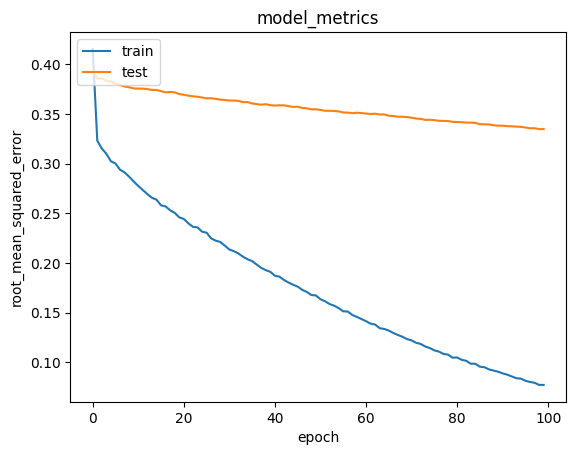

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Getting Recommendation

This code prepares the data for generating store recommendations:

1. **Drop Unnecessary Columns**: Removes columns that are not required for recommendation, such as `product_id`, `product_category_name`, and others.
2. **Group by Store Name**: Aggregates the data by `store_name`, summing up the numerical columns to create a summary for each store.
3. **Reset Index**: Resets the DataFrame index to ensure it is clean and sequential after grouping.
4. **Display Data**: Outputs the first few rows of both the aggregated DataFrame `n` and the original DataFrame `m` for comparison.


In [ ]:
n = k.drop(columns=['product_id', 'product_category_name', 'order_id', 'seller_state',  'review_id'])
n = n.groupby('store_name').sum().reset_index()
n.head()

,store_name,seller_id,seller_city,customer_id,review_score
0,adjhldtz store,c7dcd301ecfe5ab7f778ac172cf74be7c7dcd301ecfe5a...,belo horizontebelo horizontebelo horizontebelo...,da1c9a7e7fa9de1d48ecd6d6e027313e76329463ae17ce...,10.0
1,adwywoqp store,1c742ac33582852aaf3bcfbf5893abcf,belo horizonte,a71f65149295549d85fe86597d5bf59c,5.0
2,afvmaqnd store,15ead3a5037a918ddb520dfe39a3d2b915ead3a5037a91...,conselheiro lafaieteconselheiro lafaieteconsel...,c0f4986577a7d0f58fa631addd43222c4358412d9f1889...,35.0
3,almmlujd store,32fdd5d44ecb43dfd6a24b9369eca14432fdd5d44ecb43...,carmo do cajurucarmo do cajurucarmo do cajuruc...,30a79879ae652548480a139d7d6a3a660cfc1b56e94c89...,23.0
4,awvausqb store,10cdd491d1dbea8fb4ead97b19c334ce10cdd491d1dbea...,santa rita do sapucaisanta rita do sapucaisant...,1a709e5cee4949834d57464dd9c13d22346f3247d517ff...,15.0


In [ ]:
m.head()

,seller_id,customer_id,review_score,user,seller
0,95f83f51203c626648c875dd41874c7f,181e2217f874cb5390be37f378db5e07,2.0,0,0
1,95f83f51203c626648c875dd41874c7f,181e2217f874cb5390be37f378db5e07,2.0,0,0
2,95f83f51203c626648c875dd41874c7f,2ea5983ec2edde5dcba726ea64e9fadb,2.0,1,0
3,95f83f51203c626648c875dd41874c7f,014fb09b34197c57ae3c77a43d18475e,1.0,2,0
4,95f83f51203c626648c875dd41874c7f,c98cf172e6421f9786c711fa72fc90b4,5.0,3,0


This code identifies stores visited by a randomly selected user:

1. **Assign DataFrames**: The `seller_df` and `df` variables are assigned to the aggregated and original DataFrames, respectively.
2. **Select a Random User**: Randomly samples one user ID from the `customer_id` column.
3. **Identify Visited Stores**: Filters the DataFrame to find all stores that have been visited by the selected user.


In [ ]:
seller_df = n
df = m

# Taking user samples
user_id = df.customer_id.sample(1).iloc[0]
store_visited_by_user = df[df.customer_id == user_id]

This code identifies stores that the selected user has not yet visited and prepares the data for recommendations:

1. **Identify Unvisited Stores**:
   - Uses the bitwise operator `~` to filter out stores that the selected user has already visited, leaving only the unvisited ones.

2. **Intersect with Encoded Stores**:
   - Ensures that only stores with encoded IDs are considered by intersecting the unvisited stores with the encoded store IDs.

3. **Prepare Unvisited Store List**:
   - Converts the unvisited store IDs into a list of their encoded representations.

4. **Prepare User-Store Array**:
   - Creates an array combining the encoded user ID with each unvisited store ID, preparing it for input into a recommendation model.


In [ ]:
# Operator bitwise (~)
store_not_visited = seller_df[~seller_df['seller_id'].isin(store_visited_by_user.seller_id.values)]['seller_id']
store_not_visited = list(
    set(store_not_visited)
    .intersection(set(store_to_store_encoded.keys()))
)

store_not_visited = [[store_to_store_encoded.get(x)] for x in store_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_store_array = np.hstack(
    ([[user_encoder]] * len(store_not_visited), store_not_visited)
)

This code generates and displays store recommendations for the selected user:

1. **Predict Ratings**:
   - Uses the trained model to predict ratings for the unvisited stores by the selected user.
   - Flattens the prediction results into a 1D array.

2. **Identify Top-Rated Stores**:
   - Sorts the predicted ratings in descending order and selects the top 10 store indices.

3. **Map Encoded Store IDs**:
   - Converts the encoded store IDs back to their original `seller_id` values using the mapping dictionary.

4. **Display Top Visited Stores**:
   - Shows the top 5 stores that the user has already visited, ranked by their given review scores.

5. **Display Top 10 Store Recommendations**:
   - Lists the top 10 recommended stores that the user has not visited yet, based on the highest predicted ratings, along with their corresponding cities.


In [ ]:
ratings = model.predict(user_store_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_store_ids = [
    store_encoded_to_store.get(store_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Store with high ratings from user')
print('----' * 8)

top_store_user = (
    store_visited_by_user.sort_values(
        by = 'review_score',
        ascending=False
    )
    .head(5)
    .seller_id.values
)

store_df_rows = n[n['seller_id'].isin(top_store_user)]
for row in store_df_rows.itertuples():
    print(row.store_name, ':', row.seller_city)

print('----' * 8)
print('Top 10 store recommendation')
print('----' * 8)

recommended_store = n[n['seller_id'].isin(recommended_store_ids)]
for row in recommended_store.itertuples():
    print(row.store_name, 'in', row.seller_city, 'city')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step
Showing recommendations for users: 8c0a260a33c95286a9a851fe8bf42797
Store with high ratings from user
--------------------------------
--------------------------------
Top 10 store recommendation
--------------------------------
cdrtaiba store in belo horizonte city
dbwgppyt store in lagoa da prata city
deoicbzb store in sete lagoas city
dlmmagek store in belo horizonte city
hfsuneqo store in tres coracoes city
hgtwycce store in belo horizonte city
itvvglhm store in betim city
nkcpebjx store in belo horizonte city
nshnmxxy store in pouso alegre city
ocdjhzqb store in uberaba city
